In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils, probeReadWrite
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from cycler import cycler
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import statsmodels.api as sm
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4


In [3]:
runs = {
    # 234: {'B': False, 'detT': 0, 'A': 0,  'WS': 4, 'C': 2},
    # 233: {'B': False, 'detT': 0, 'A': 45, 'WS': 4, 'C': 2},
    # 236: {'B': False, 'detT': 0, 'A': 0,  'WS': 2, 'C': 2},
    # 221: {'B': True,  'detT': 4, 'A': 0,  'WS': 4, 'C': 2},
    # 222: {'B': False, 'detT': 0, 'A': 45, 'WS': 2, 'C': 2},
    # 223: {'B': True,  'detT': 4, 'A': 0,  'WS': 2, 'C': 2},
    # 224: {'B': True,  'detT': 4, 'A': 45, 'WS': 2, 'C': 2},
    # 225: {'B': True,  'detT': 4, 'A': 45, 'WS': 4, 'C': 2},
    # 227: {'B': True,  'detT': 4, 'A': 45, 'WS': 6, 'C': 2},
    # 228: {'B': True,  'detT': 4, 'A': 0,  'WS': 6, 'C': 2},
    # 229: {'B': False, 'detT': 0, 'A': 0,  'WS': 6, 'C': 2},
    # 230: {'B': False, 'detT': 0, 'A': 45, 'WS': 6, 'C': 2},
    # 305: {'B': False, 'detT': 0, 'A': 0,  'WS': 4, 'C': 3},
    # 306: {'B': False, 'detT': 0, 'A': 45, 'WS': 4, 'C': 3},
    # 307: {'B': False, 'detT': 0, 'A': 0,  'WS': 2, 'C': 3},
    # 308: {'B': False, 'detT': 0, 'A': 45, 'WS': 2, 'C': 3},
}


runs = {
    221: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 0, 'WS': 4, 'C': 2},
    234: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 4, 'C': 2},
    235: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 0, 'WS': 2, 'C': 2},
    237: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 0, 'WS': 2, 'C': 2},
    236: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 2, 'C': 2},
    225: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 45,'WS': 4, 'C': 2},
    233: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 4, 'C': 2},
    239: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 45,'WS': 2, 'C': 2},
    238: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 45,'WS': 2, 'C': 2},
    222: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 2, 'C': 2},
}

# plotFolder = f"{home_dir}/CHARLES/multiPlots/"
plotFolder = f"{home_dir}/CHARLES/multiPlots/quickRiCompare/"

In [4]:
allFlowStats = {}
allRoomVentilation = {}
for i, run in enumerate(runs):
    C = runs[run]['C']
    category = f"config{C}"
    R = run % 100
    probes_dir = f'{home_dir}/CHARLES/{category}/R{R}/probes/probesOut_parquet'
    locations_dir = f'{scratch_dir}/CHARLES/{category}/R{R}/probes/locations'
    print(probes_dir)
    flowStatsPath = f"{probes_dir}/../flowStats.csv"
    roomVentilationPath = f"{probes_dir}/../roomVentiation.csv"
    if os.path.exists(roomVentilationPath) and os.path.exists(flowStatsPath):
        roomVentilation = pd.read_csv(roomVentilationPath, index_col=0)
        flowStats = pd.read_csv(flowStatsPath, index_col=0)
    else:
        raise Exception(f"Run {run} does not has associated ventilation files. Run createVentilationStats.slurm from run folder first.")
        
    allFlowStats[run] = flowStats
    allRoomVentilation[run] = roomVentilation


/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R21/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R34/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R35/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R37/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R36/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R25/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R33/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R39/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R38/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARL

In [5]:
flowStatsMI = pd.concat(allFlowStats.values(), keys=allFlowStats.keys())
roomVentilationMI = pd.concat(allRoomVentilation.values(), keys=allRoomVentilation.keys())

display(flowStatsMI["EPR_mag"])
display(roomVentilationMI)


221  xwindow_0-0_h_0--1    3.110367
     zwindow_0-0_h_0--1    3.110367
     zwindow_2-0_h_0--1    3.110367
     zwindow_2-1_h_0--1    3.110367
     xwindow_0-1_h_0--1    3.110367
                             ...   
222  xwindow_0-1_sl_Bz     1.692373
     zwindow_0-1_sl_Bz     1.692373
     zwindow_1-1_sl_Bz     1.692373
     skylight_1-0_sl_Bz    1.692373
     zwindow_1-0_sl_Bz     1.692373
Name: EPR_mag, Length: 2160, dtype: float64

mean       net  \
221 corner_h_0--1_B  0.029428  0.076572   
    cross_h_0--1_B   0.009872  0.063867   
    dual_h_0--1_B    0.054422  0.117264   
    single_h_0--1_B  0.000199  0.000289   
    corner_h_0--2_B  0.014308  0.088117   
...                       ...       ...   
222 single_h_0-2_Bz  0.000314  0.000476   
    corner_sl_Bz     0.163396  0.163996   
    cross_sl_Bz      0.358911  0.367931   
    dual_sl_Bz       0.263216  0.278992   
    single_sl_Bz     0.007385  0.028124   

                                                             EP_normal  \
221 corner_h_0--1_B                  [-0.27160278, 0.1165600142980866]   
    cross_h_0--1_B                 [0.08302476660420982, -0.021972435]   
    dual_h_0--1_B     [-0.37828079476428333, 0.017496681, 0.025365584]   
    single_h_0--1_B                               [0.1009199747364242]   
    corner_h_0--2_B                         [-0.35750207, 0.036202246]   
...                                                                ...   
222 single_h_0-2_Bz                              [0.14723745235441055]   
    corner_sl_Bz     [-0.08260172184135786, -0.04743895797157133, 0...   
    cross_sl_Bz      [-0.09054823721807889, -0.020036097, 0.1046568...   
    dual_sl_Bz       [-0.060846910314029445, 0.03421525684075574, 0...   
    single_sl_Bz           [-0.12670527525472272, 0.07935010306351631]   

                     EP_shear   EPR_mag houseType blockType roomType  \
221 corner_h_0--1_B  1.697419  3.110367      0--1         B   corner   
    cross_h_0--1_B   2.660225  3.110367      0--1         B    cross   
    dual_h_0--1_B    2.650366  3.110367      0--1         B     dual   
    single_h_0--1_B  1.411405  3.110367      0--1         B   single   
    corner_h_0--2_B  1.667260  3.596527      0--2         B   corner   
...                       ...       ...       ...       ...      ...   
222 single_h_0-2_Bz  0.815205  2.053083       0-2        Bz   single   
    corner_sl_Bz     2.330519  1.692373        sl        Bz   corner   
    cross_sl_Bz      3.802354  1.692373        sl        Bz    cross   
    dual_sl_Bz       3.740352  1.692373        sl        Bz     dual   
    single_sl_Bz     2.196944  1.692373        sl        Bz   single   

                              x         y          z  nWindows  contResid  \
221 corner_h_0--1_B   47.015594  1.497615  33.055550         2   0.000460   
    cross_h_0--1_B    55.999773  1.497595  36.035254         2  -0.000817   
    dual_h_0--1_B     48.675774  1.500022  39.306152         3   0.000068   
    single_h_0--1_B   51.998942  1.495154  32.111106         1  -0.000398   
    corner_h_0--2_B   55.016136  1.500000   9.022450         2   0.000483   
...                         ...       ...        ...       ...        ...   
222 single_h_0-2_Bz  104.023340  1.499420 -59.997758         1   0.000628   
    corner_sl_Bz      57.358756  1.966833 -39.331883         3  -0.003478   
    cross_sl_Bz       59.999651  2.203340 -48.000003         4   0.007996   
    dual_sl_Bz        62.769886  2.060568 -41.199981         5   0.006955   
    single_sl_Bz      57.039356  2.197882 -44.000548         2  -0.000270   

                     EP_normal_mag  EP_normal_sum  EP_normal_ratio  
221 corner_h_0--1_B       0.388163       0.155043         0.714578  
    cross_h_0--1_B        0.104997       0.061052         0.632325  
    dual_h_0--1_B         0.421143       0.335419         0.556654  
    single_h_0--1_B       0.100920       0.100920         0.500000  
    corner_h_0--2_B       0.393704       0.321300         0.550632  
...                            ...            ...              ...  
222 single_h_0-2_Bz       0.147237       0.147237         0.500000  
    corner_sl_Bz          0.249029       0.011052         0.957504  
    cross_sl_Bz           0.284864       0.075551         0.790379  
    dual_sl_Bz            0.618743       0.497050         0.554532  
    single_sl_Bz          0.206055       0.047355         0.813129  



In [6]:

flowStatsMI = getWindowOrientations(flowStatsMI)
roomVentilationMI = getRoomOrientations(roomVentilationMI)

flowStatsMI = fillInParams(flowStatsMI, runs, velTenMeters)
roomVentilationMI = fillInParams(roomVentilationMI, runs, velTenMeters)

flowStatsMI["roomA"] = flowStatsMI["roomOrientation"] + flowStatsMI["A"]

for param in ["mean", "net"]:
    flowStatsMI[f"{param}NormEP"] = flowStatsMI[param] / flowStatsMI["EP_mag"] * velTenMeters
    roomVentilationMI[f"{param}NormEP"] = roomVentilationMI[param] / roomVentilationMI["EP_normal_mag"] * velTenMeters

flowStatsMI.to_csv(f'{plotFolder}flowStatsMI.csv')
roomVentilationMI.to_csv(f'{plotFolder}roomVentilationMI.csv')

flowStatsMI["houseType"].replace(["0--2", "0--1", "0-0", "0-1", "0-2"], ['3-0', '3-1', '3-2', '3-3', '3-4'], inplace = True)
roomVentilationMI["houseType"].replace(["0--2", "0--1", "0-0", "0-1", "0-2"], ['3-0', '3-1', '3-2', '3-3', '3-4'], inplace = True)


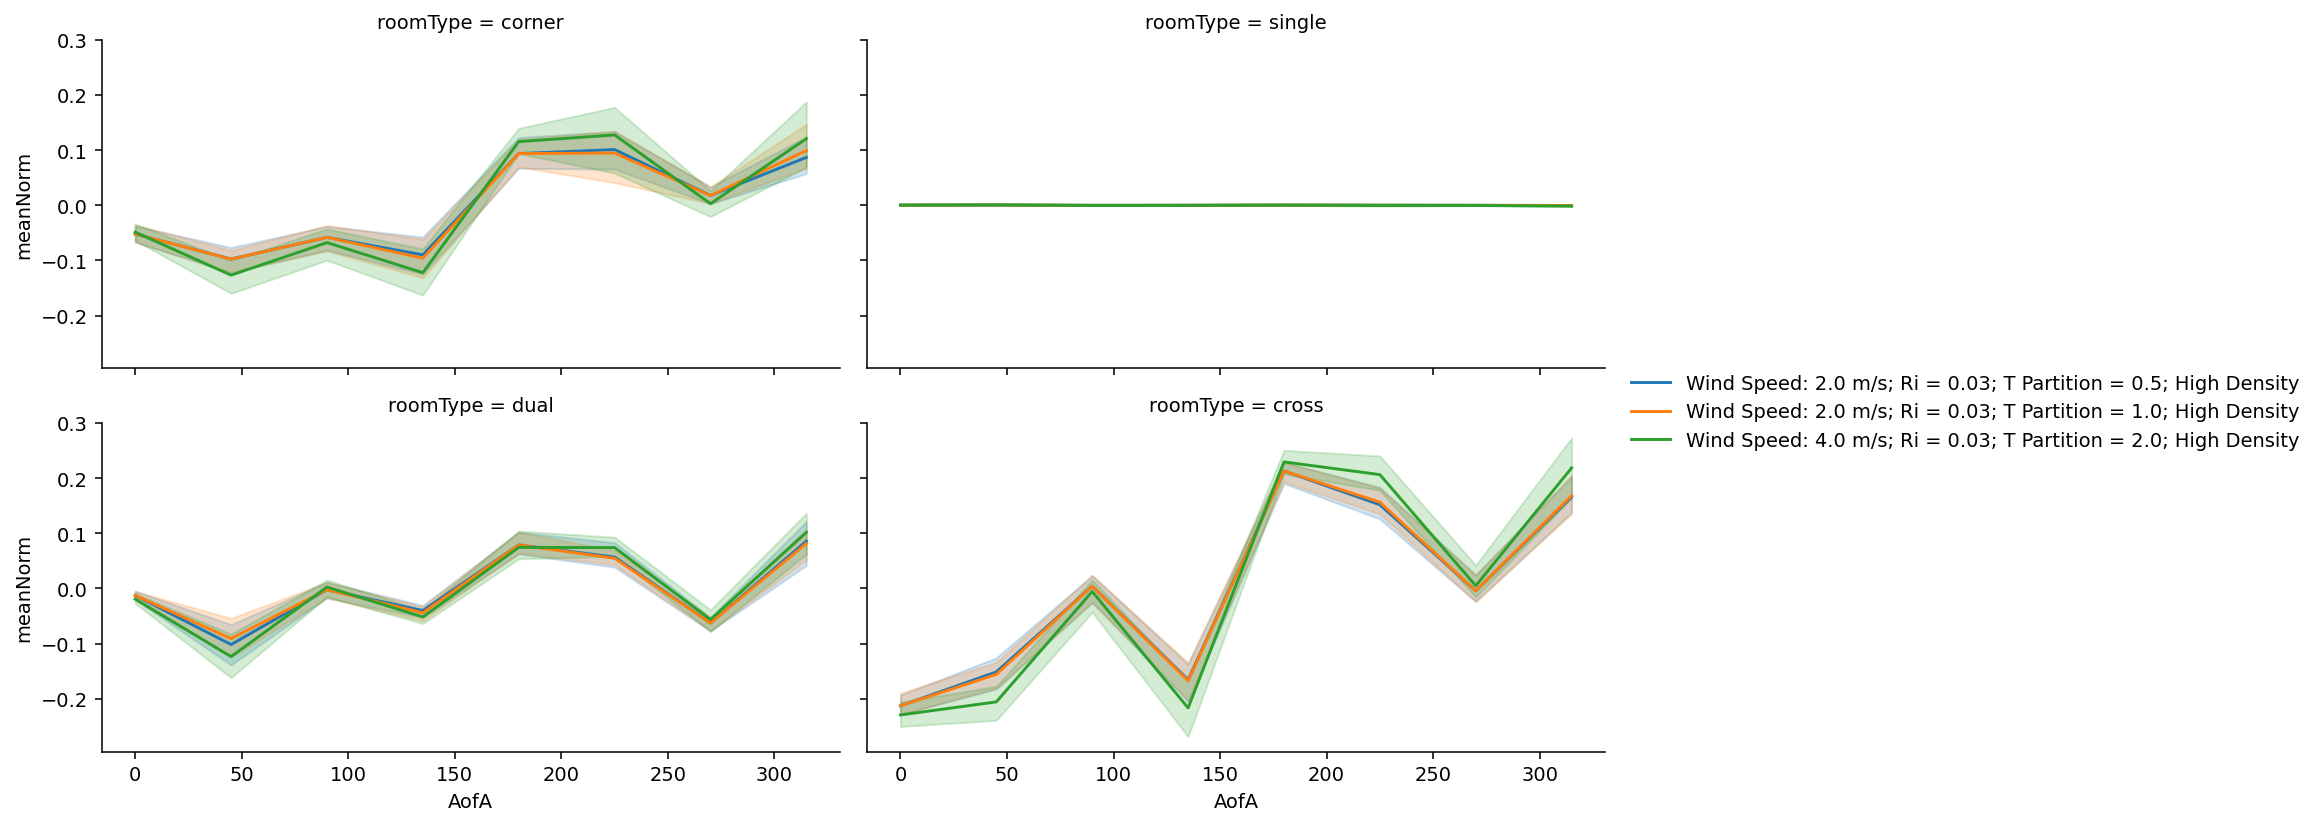

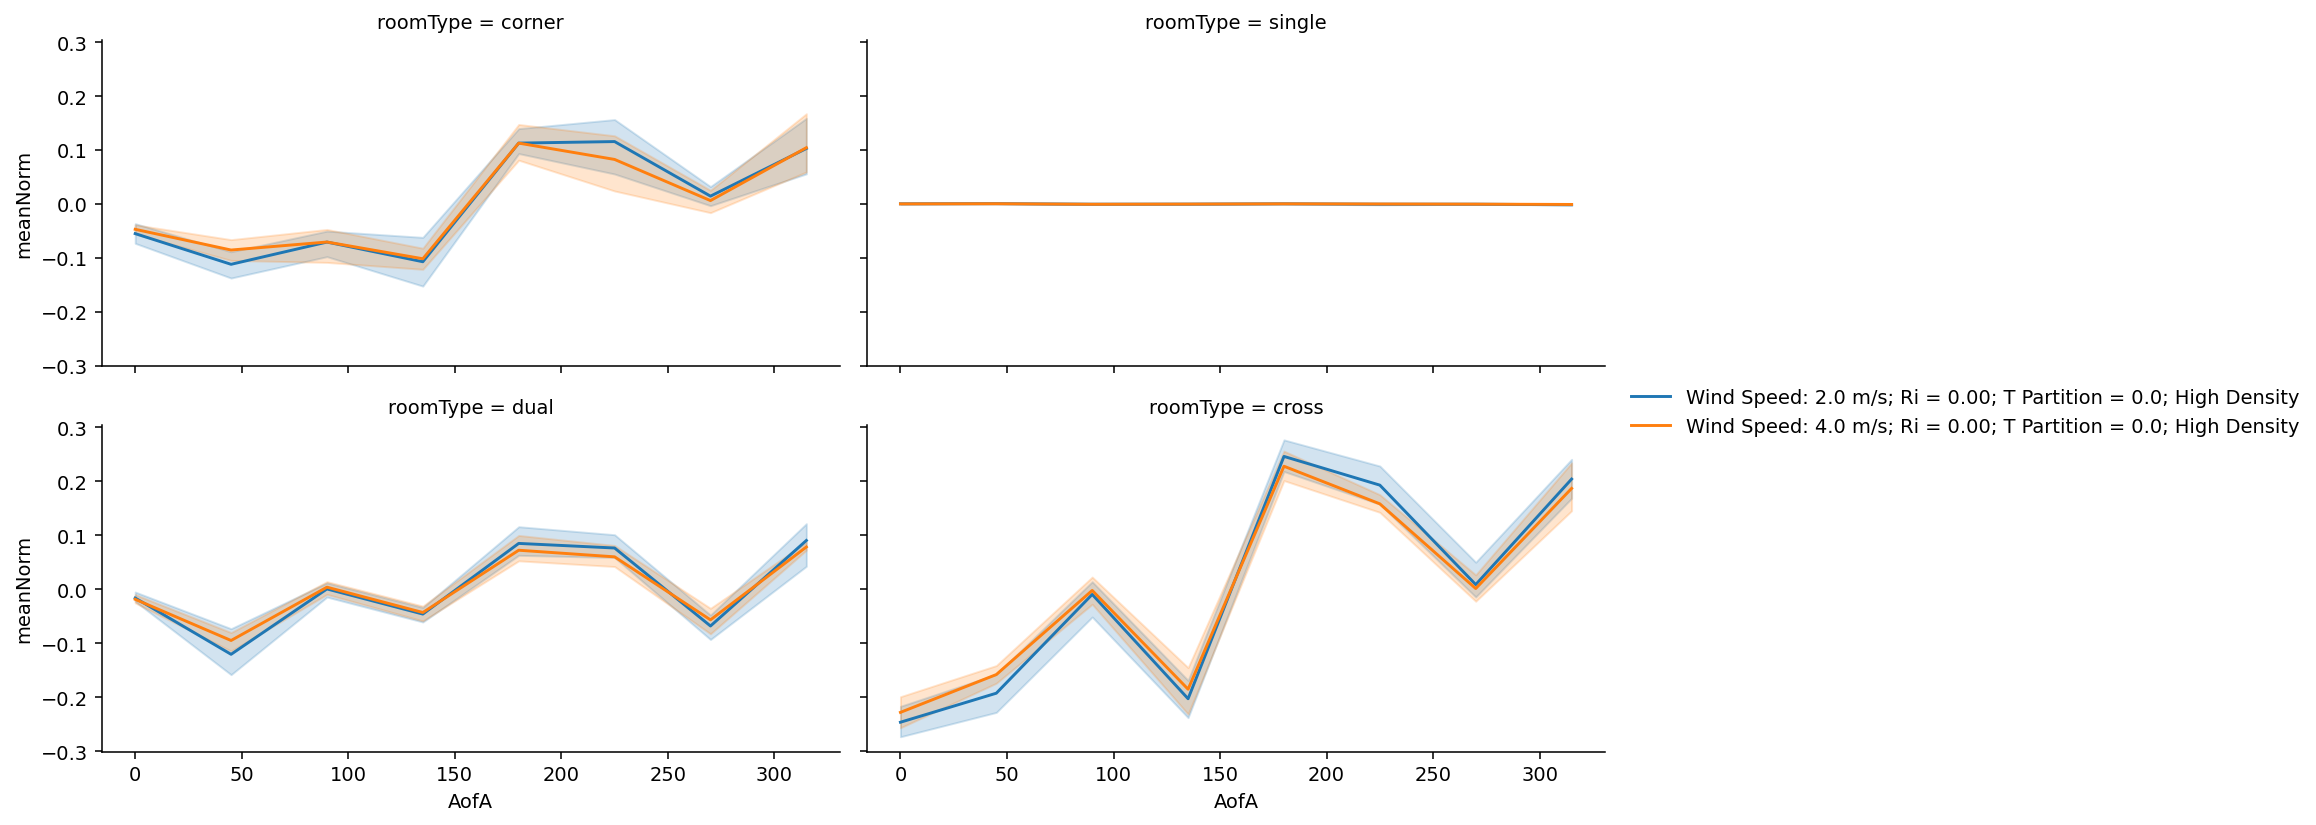

In [26]:
for Ri in flowStatsMI["Ri"].unique():
    plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
    plotdf = plotdf[plotdf["houseType"] != "sl"]
    # plotdf = plotdf[plotdf["roomType"] == "corner"]
    plotdf = plotdf[plotdf["Ri"] == Ri]

    plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
    g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 2, legend_out = True)
    # g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
    g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
    g.add_legend()

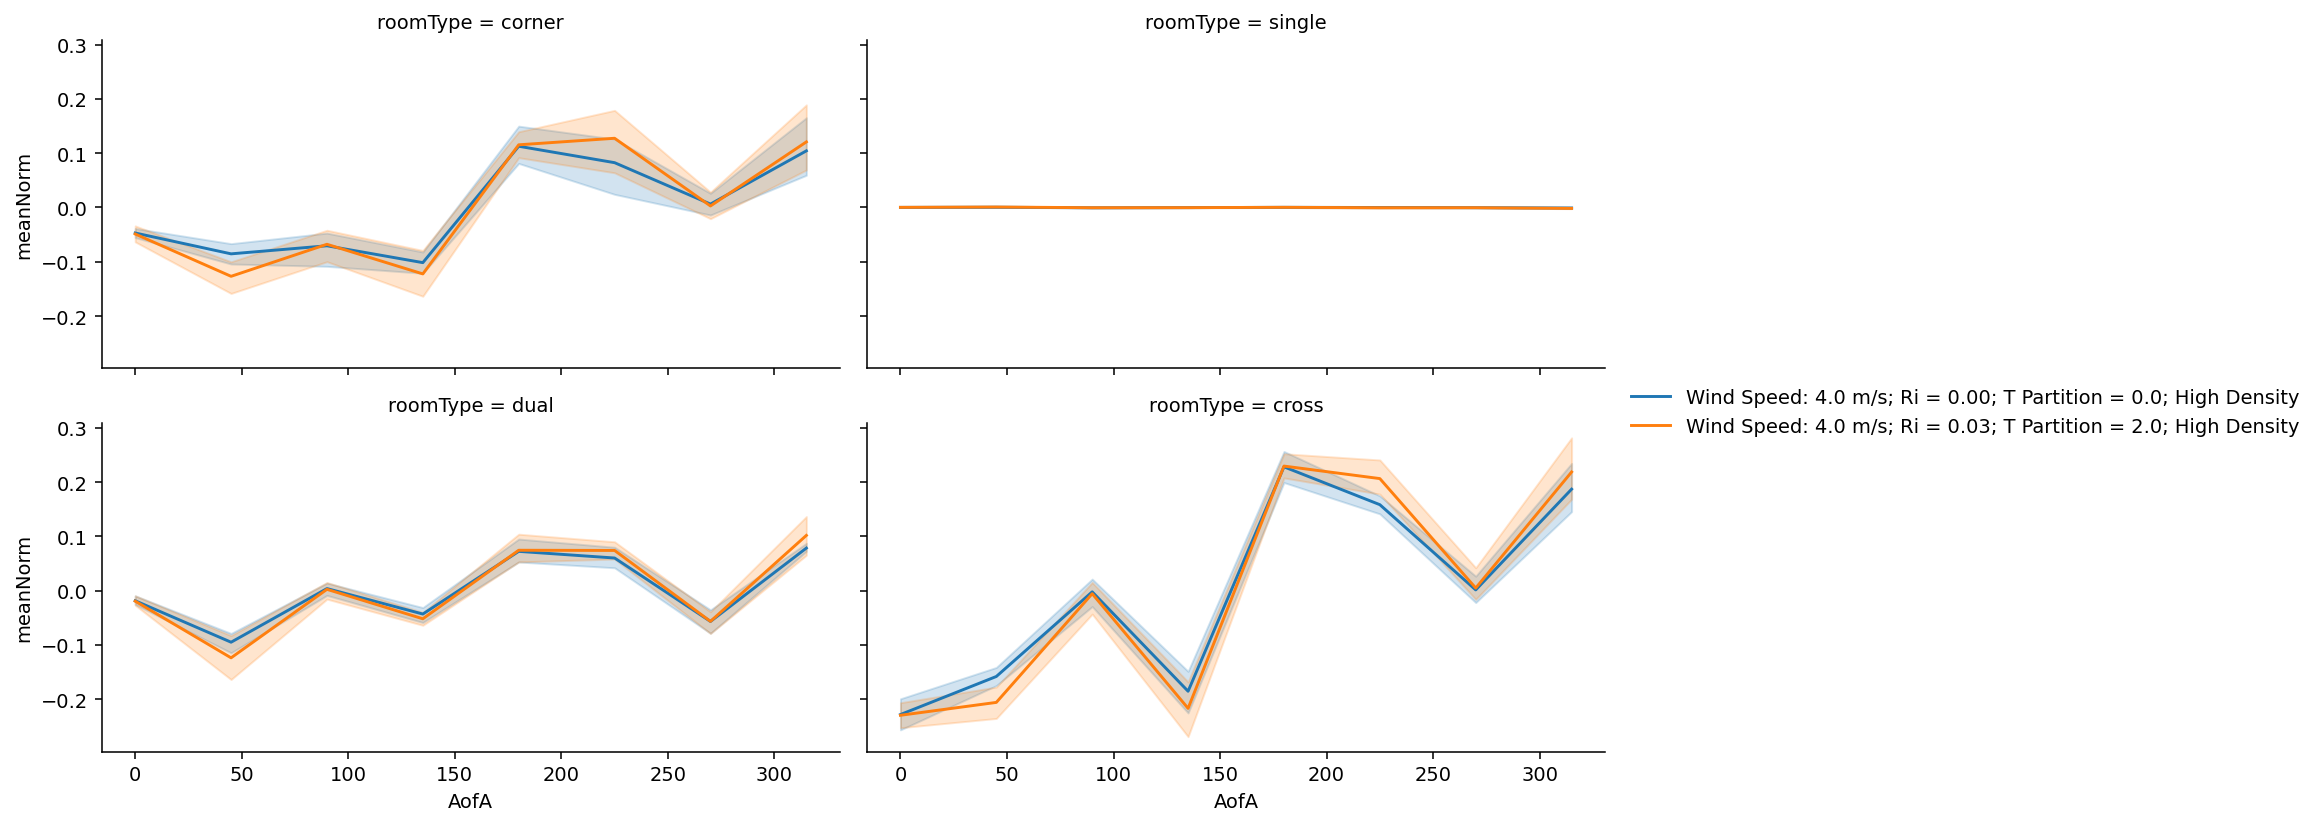

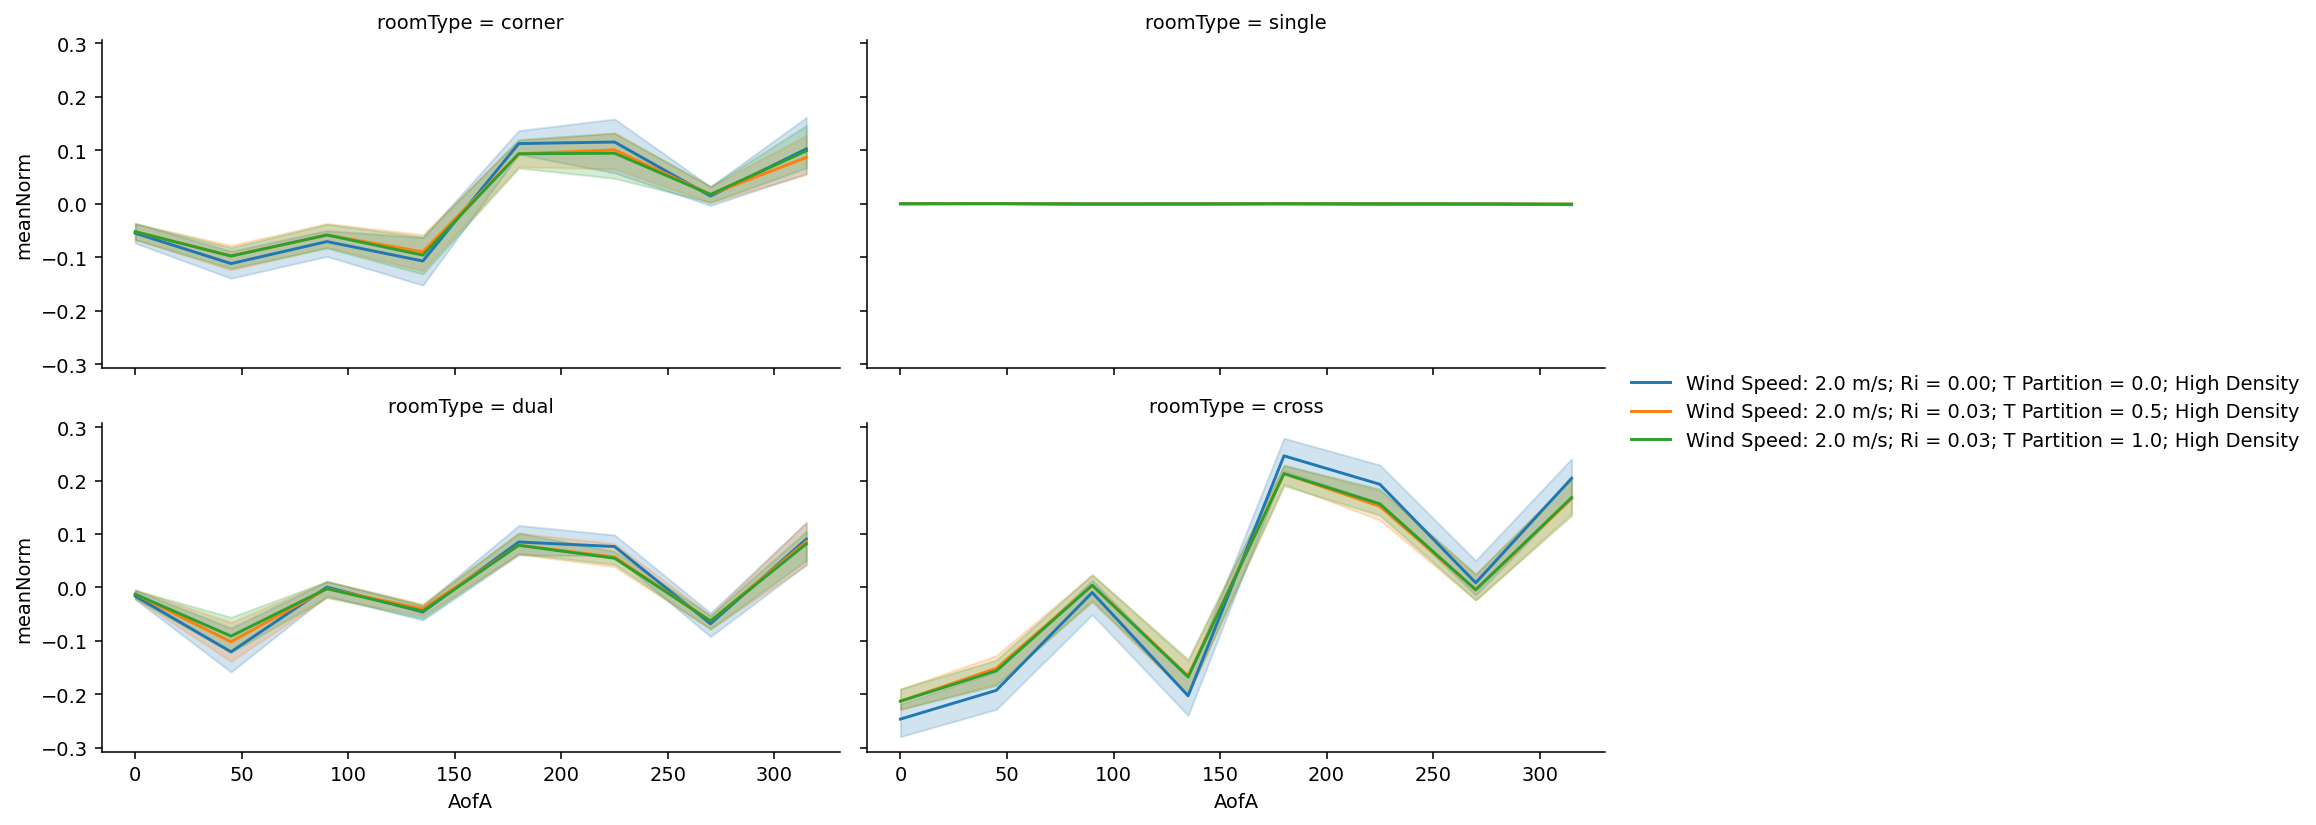

In [27]:
for WS in flowStatsMI["WS"].unique():
    plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
    plotdf = plotdf[plotdf["houseType"] != "sl"]
    # plotdf = plotdf[plotdf["roomType"] == "corner"]
    plotdf = plotdf[plotdf["WS"] == WS]

    plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
    g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 2, legend_out = True)
    # g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
    g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
    g.add_legend()

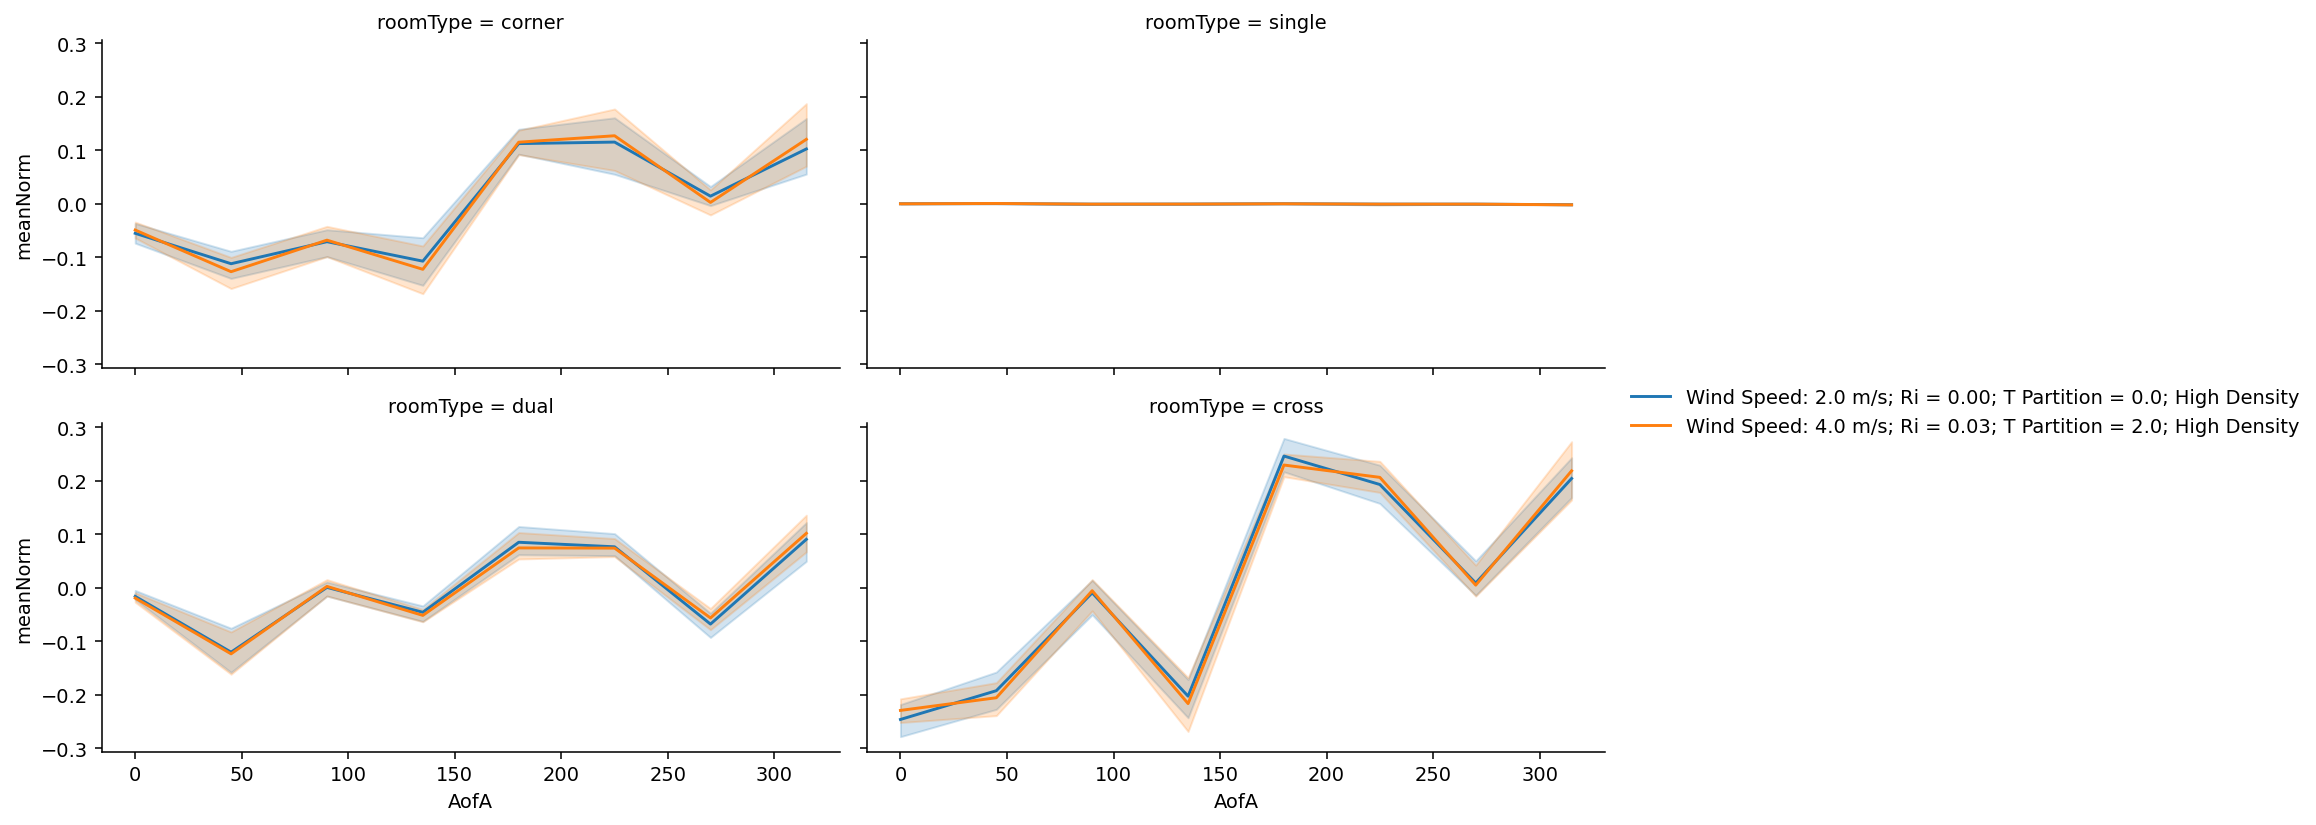

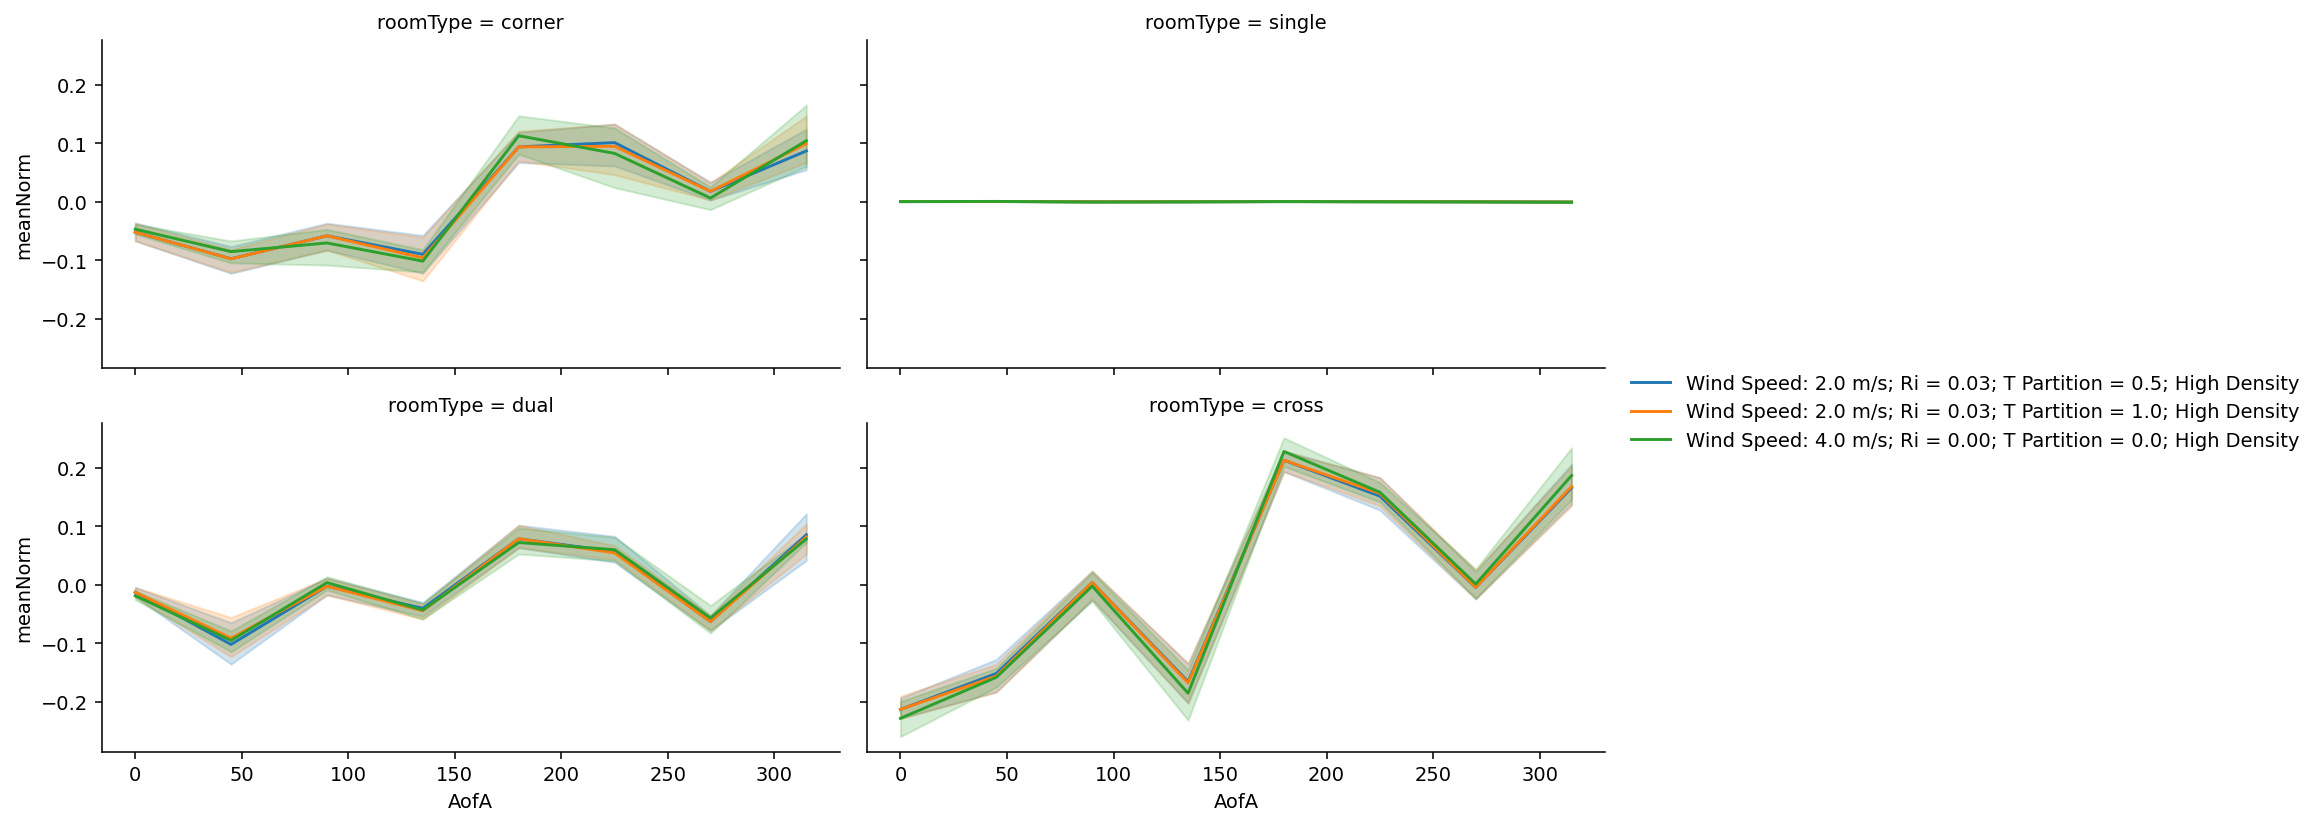

In [29]:
paramGroup = ["Wind Speed: 2.0 m/s; Ri = 0.00; T Partition = 0.0; High Density", "Wind Speed: 4.0 m/s; Ri = 0.03; T Partition = 2.0; High Density"]

for iBool in [True, False]:
    plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
    plotdf = plotdf[plotdf["houseType"] != "sl"]
    # plotdf = plotdf[plotdf["roomType"] == "corner"]
    plotdf = plotdf[plotdf["Params"].isin(paramGroup) == iBool]

    plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
    g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 2, legend_out = True)
    # g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
    g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
    g.add_legend()

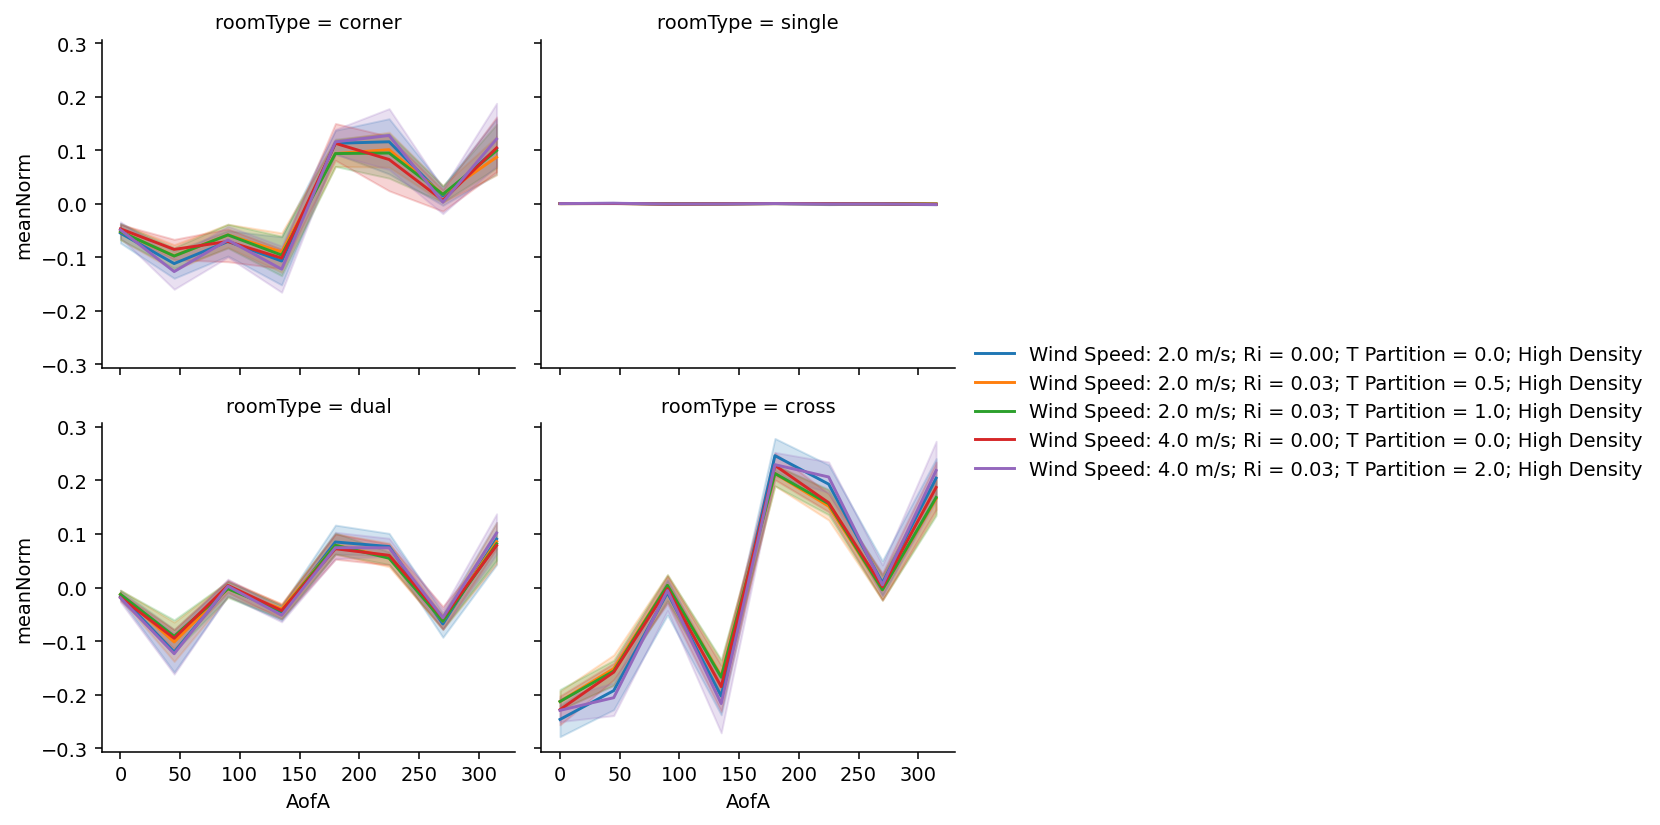

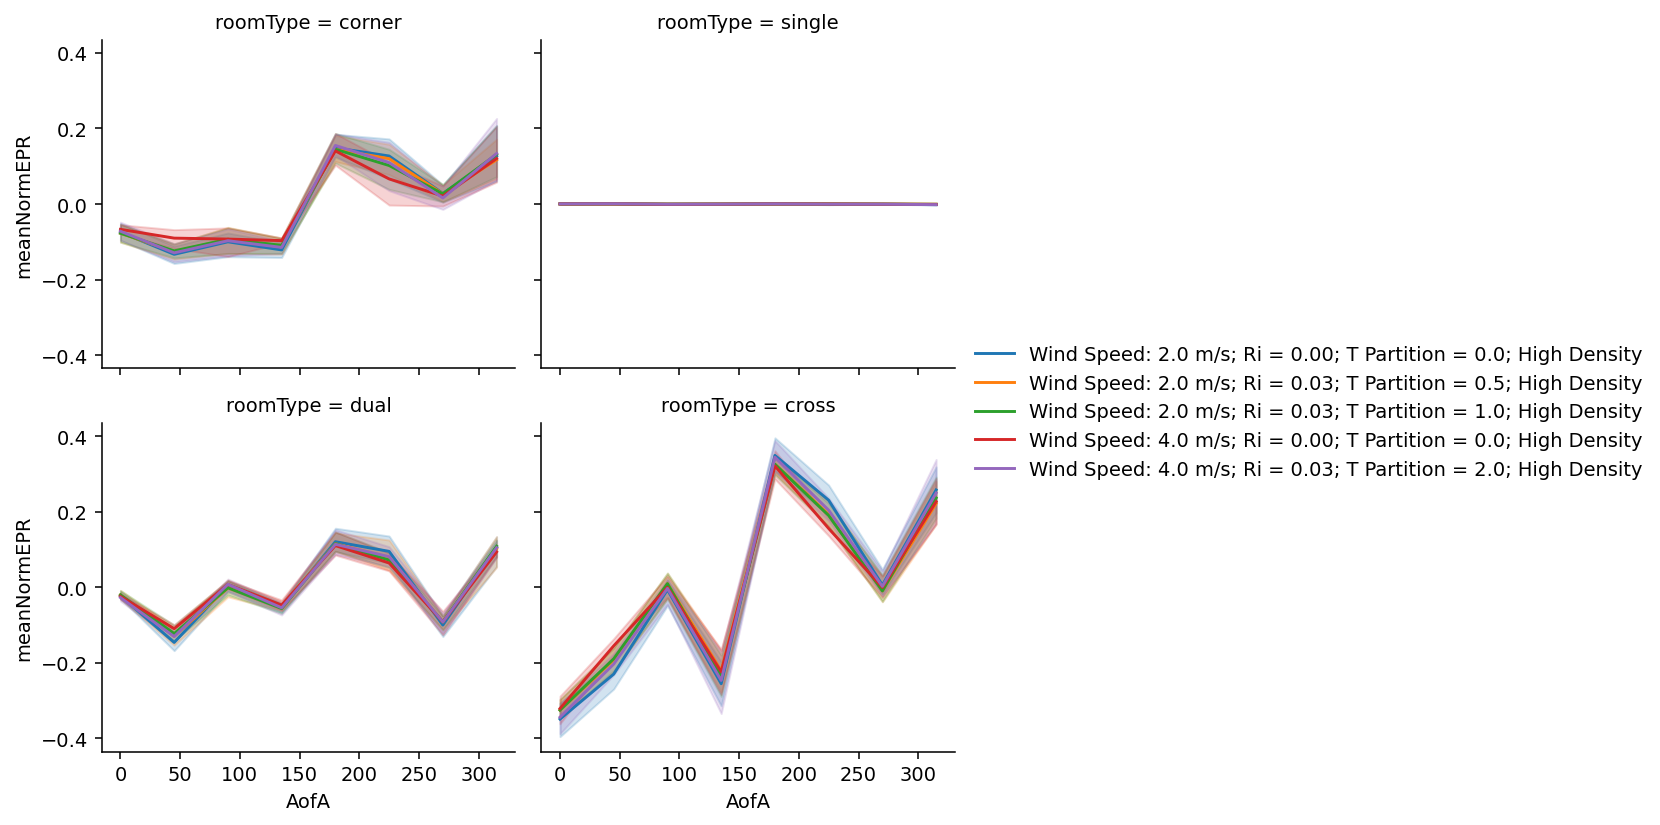

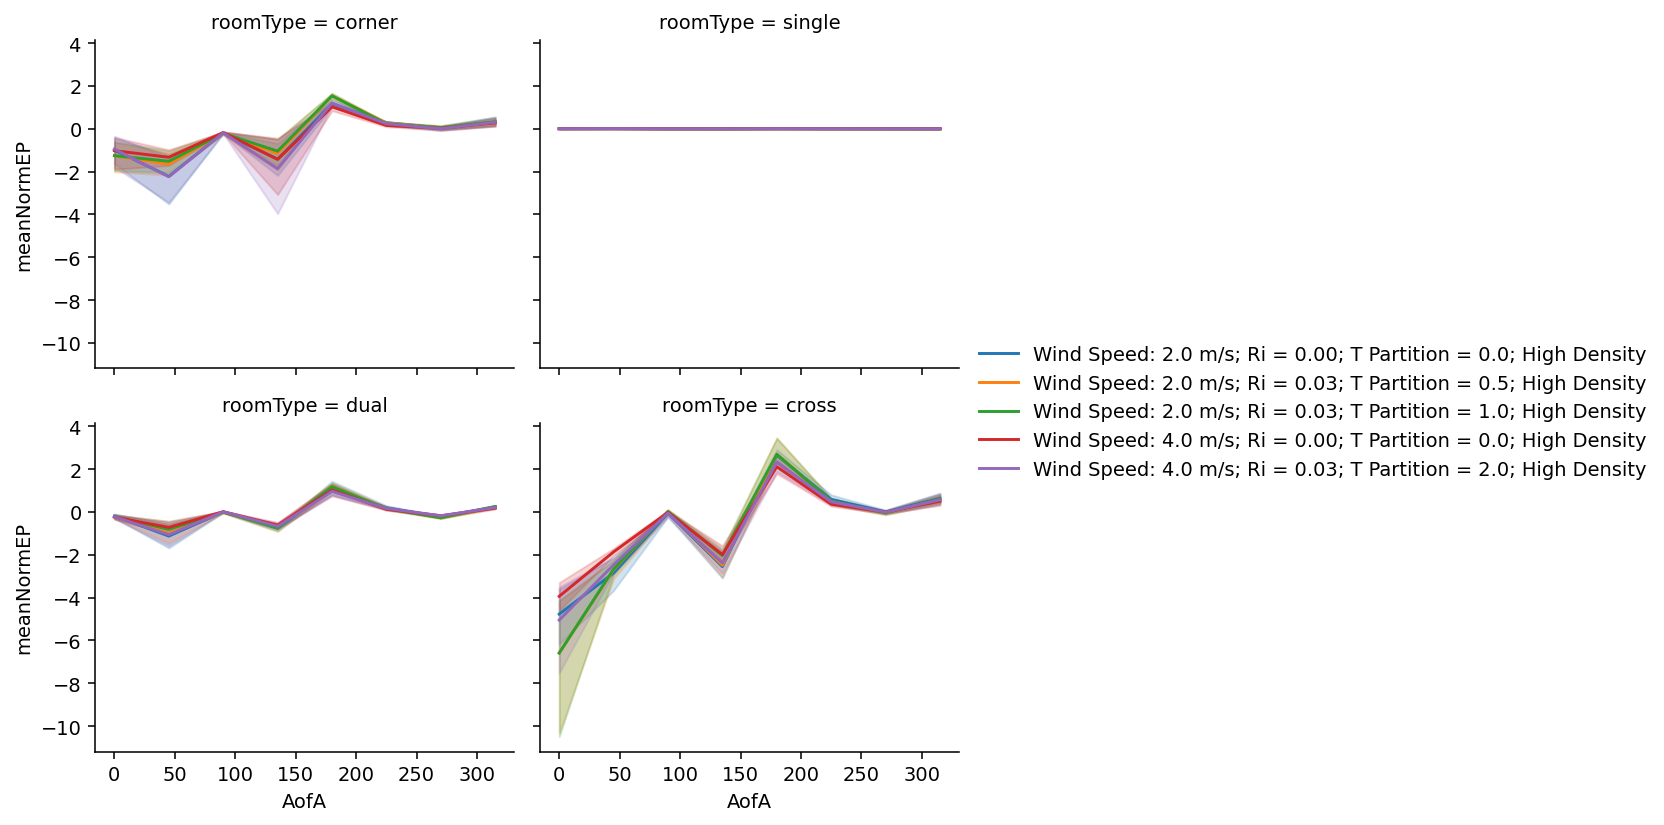

In [31]:
plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
plotdf = plotdf[plotdf["houseType"] != "sl"]

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
g.add_legend()

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNormEPR", "Params", palette = "tab10")
g.add_legend()

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNormEP", "Params", palette = "tab10")
g.add_legend()

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs

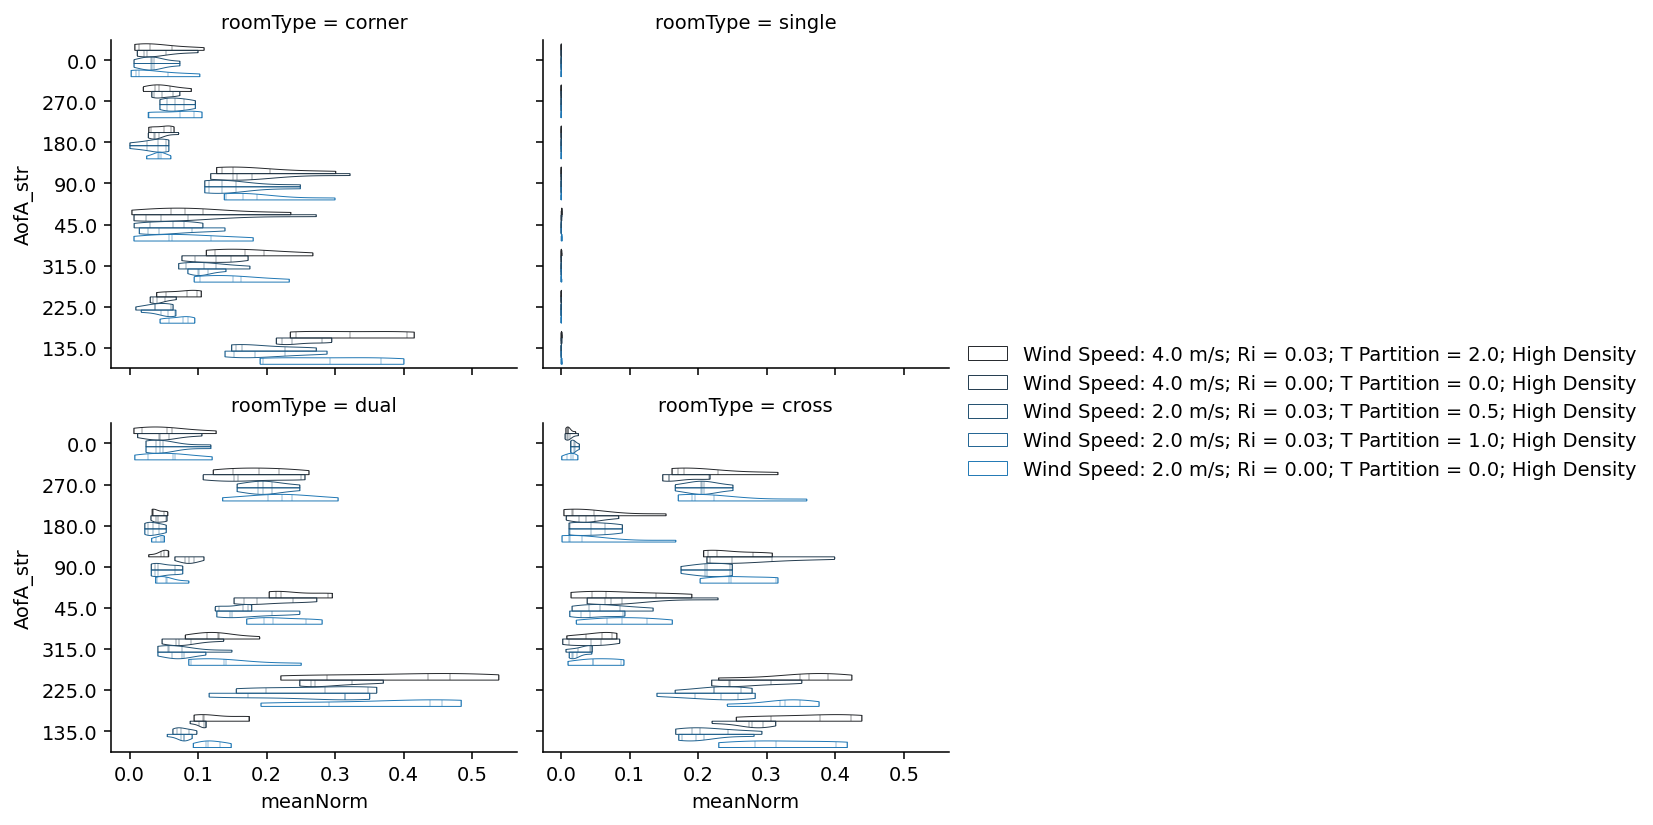

In [37]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.scatterplot, "meanNorm", "AofA_str", "B", style = roomVentilationMI["WS"], palette = "tab10", markers = [10, 11])
# g.map(sns.stripplot, "meanNorm", "AofA_str", "Params", palette = "tab10", size=2, dodge = True, jitter= False)
g.map(sns.violinplot, "meanNorm", "AofA_str", "Params", fill = False, inner = "stick", linewidth = .5, density_norm = "width", cut = 0, split=True)

# g.map(sns.rugplot, "meanNorm", "AofA", "B")
g.add_legend()

In [38]:
plotdf = plotdf.sort_values(["Params"])
fig1 = px.bar_polar(plotdf, r="netNorm", theta="AofA",
                   color="roomType", template="plotly_dark", pattern_shape = "WS",
                   color_discrete_sequence= px.colors.sequential.Viridis)
fig1.show()

fig2 = px.bar_polar(plotdf, r="netNorm", theta="AofA",
                   color="roomType", template="plotly_dark", pattern_shape = "B",
                   color_discrete_sequence= px.colors.sequential.Viridis)
fig2.show()

In [39]:
plotdf = plotdf.sort_values(["houseType", "Params"])
# plotdf = plotdf.sort_values("Params")
color_labels = ["Params"]
for i, color_label in enumerate(color_labels):
    plotdf_frac = plotdf.copy()
    fracN = plotdf_frac.shape[0] / (len(set(plotdf_frac["roomType"])) * len(set(plotdf_frac["AofA"])))
    plotdf_frac[["netNorm", "meanNorm"]] = plotdf_frac[["netNorm", "meanNorm"]] / fracN
    rooms = ["corner", "single", "dual", "cross"]
    # params = set(plotdf[color_label])
    # marker_color=px.colors.qualitative.Safe #["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4']
    # color_map = {}
    # for i, param in enumerate(params):
    #     color_map[i] = marker_color[i]
    # color_map = px.colors.sequential.Viridis

    figures = []
    for i, room in enumerate(rooms):
        fig = px.bar_polar(plotdf_frac[plotdf_frac["roomType"] == room], r="netNorm", theta="AofA",
                    color=color_label, template="plotly_dark", hover_data = ["houseType"],
                    color_discrete_sequence=px.colors.qualitative.Safe, title=room)
        figures.append(fig)

    fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2, subplot_titles=rooms, vertical_spacing=0.2)

    for i, figure in enumerate(figures):
        for trace in range(len(figure["data"])):
            room = rooms[i]
            row = int((i/2)+1)
            col = int((i%2)+1)
            # print(row, col)
            trace = figure["data"][trace]
            if i>0:
                trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
            fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

    # fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
    fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
    fig.update_layout(width = 1000, height = 800)


    fig.show()
    fig.write_image(f'{plotFolder}radialByParams.png', scale=2)
    
    # print(fig)

In [40]:
plotdf = plotdf.sort_values(["houseType", "Params"])
# plotdf = plotdf.sort_values("Params")
color_labels = ["Params"]
for i, color_label in enumerate(color_labels):
    plotdf_frac = plotdf.copy()
    fracN = plotdf_frac.shape[0] / (len(set(plotdf_frac["roomType"])) * len(set(plotdf_frac["AofA"])))
    plotdf_frac[["netNorm", "meanNorm", "netNormEPR", "meanNormEPR"]] = plotdf_frac[["netNorm", "meanNorm", "netNormEPR", "meanNormEPR"]] / fracN
    rooms = ["corner", "single", "dual", "cross"]
    # params = set(plotdf[color_label])
    # marker_color=px.colors.qualitative.Safe #["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4']
    # color_map = {}
    # for i, param in enumerate(params):
    #     color_map[i] = marker_color[i]
    # color_map = px.colors.sequential.Viridis

    figures = []
    for i, room in enumerate(rooms):
        plotdf_frac_room = plotdf_frac[plotdf_frac["roomType"] == room]
        fig = px.bar_polar(plotdf_frac_room, r="netNormEPR", theta="AofA",
                    color=color_label, template="plotly_dark", hover_data = ["houseType"],
                    color_discrete_sequence=px.colors.qualitative.Safe, title=room)
        figures.append(fig)

    fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2, subplot_titles=rooms, vertical_spacing=0.2)

    for i, figure in enumerate(figures):
        for trace in range(len(figure["data"])):
            room = rooms[i]
            row = int((i/2)+1)
            col = int((i%2)+1)
            # print(row, col)
            trace = figure["data"][trace]
            if i>0:
                trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
            fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

    # fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.5])
    fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.5])
    fig.update_layout(width = 1000, height = 800)


    fig.show()
    fig.write_image(f'{plotFolder}radialByParamsEPR.png', scale=2)
    
    # print(fig)

In [41]:
def getComparativeDf(df, split_col, sort_cols = ['WS', 'B', 'AofA', 'C']):
    values = list(set(df[split_col]))
    display(f"splitting {split_col} along values {values}")
    sort_cols = [c for c in sort_cols if c != split_col]
    plotdfMulti = df.set_index([split_col, df.index]).sort_index(level = 0)
    dfs = []
    for v in values:
        df_v = plotdfMulti.loc[v]
        df_v = df_v.set_index([*sort_cols, df_v.index.droplevel(0)]).sort_index()
        dfs.append(df_v)
    dfComp = pd.concat(dfs, axis = "columns", keys = values)    
    dfComp = dfComp.swaplevel(axis = "columns")
    dfComp.sort_values(sort_cols, inplace=True)
    return dfComp, values

def indMulti(ind: pd.core.indexes.multi.MultiIndex, cols: list):
    data = []
    for col in cols:
        data.append(ind.get_level_values(col).astype(str))
    if len(data) == 1:
        return data[0]
    return data


In [42]:
dfCompParams, valuesParams = getComparativeDf(plotdf, "Params")
fig = px.scatter(x = dfCompParams[('netNorm', valuesParams[0])], y = dfCompParams[('netNorm', valuesParams[1])], symbol = dfCompParams[('roomType', valuesParams[0])], color = indMulti(dfCompParams.index, ['C']), hover_data = indMulti(dfCompParams.index, ['B', 'AofA']))

# fig.add_shape(type="line",
#               x0=0, 
#               y0=0, 
#               x1=np.max(dfCompWS["netNorm"]), 
#               y1=np.max(dfCompWS["netNorm"]))

fig.show()

"splitting Params along values ['Wind Speed: 2.0 m/s; Ri = 0.03; T Partition = 1.0; High Density', 'Wind Speed: 4.0 m/s; Ri = 0.03; T Partition = 2.0; High Density', 'Wind Speed: 4.0 m/s; Ri = 0.00; T Partition = 0.0; High Density', 'Wind Speed: 2.0 m/s; Ri = 0.03; T Partition = 0.5; High Density', 'Wind Speed: 2.0 m/s; Ri = 0.00; T Partition = 0.0; High Density']"

In [43]:
dfCompWS, valuesWS = getComparativeDf(plotdf, "WS")
fig = px.scatter(x = dfCompWS[('netNorm', valuesWS[0])], y = dfCompWS[('netNorm', valuesWS[1])], symbol = dfCompWS[('roomType', valuesWS[0])], color = indMulti(dfCompWS.index, ['C']), hover_data = indMulti(dfCompWS.index, ['B', 'AofA']))

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=np.max(dfCompWS["netNorm"]), 
              y1=np.max(dfCompWS["netNorm"]))

fig.update_layout(
    # xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
    xaxis_title=r'$U_{10} = 2 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    yaxis_title=r'$U_{10} = 4 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    # legend_title=r'Room Type',
)
fig.show()
fig.write_image(f'{plotFolder}scatterWS_2-4.png', scale=2)

fig = px.scatter(x = dfCompWS[('netNorm', valuesWS[1])], y = dfCompWS[('netNorm', valuesWS[2])], symbol = dfCompWS[('roomType', valuesWS[1])], color = indMulti(dfCompWS.index, ['C']), hover_data = indMulti(dfCompWS.index, ['B', 'AofA']))

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=np.max(dfCompWS["netNorm"]), 
              y1=np.max(dfCompWS["netNorm"]))

fig.update_layout(
    # xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
    xaxis_title=r'$U_{10} = 4 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    yaxis_title=r'$U_{10} = 6 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    # legend_title=r'Room Type',
)
fig.show()
fig.write_image(f'{plotFolder}scatterWS_4-6.png', scale=2)

'splitting WS along values [2.0, 4.0]'

IndexError: list index out of range

In [ ]:
dfCompB, valuesB = getComparativeDf(plotdf, "B")

dfCompB = dfCompB.dropna(axis = "rows")
color_data = dfCompB[("Ri", valuesB[1])]
color_data = color_data.apply(lambda i: str(round(i, 2)))
fig = px.scatter(x = dfCompB[('netNorm', valuesB[0])], y = dfCompB[('netNorm', valuesB[1])], symbol = dfCompB[('roomType', valuesB[0])], color = color_data, hover_data = indMulti(dfCompB.index, ['C', 'AofA']))

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=np.max(dfCompB["netNorm"]), 
              y1=np.max(dfCompB["netNorm"]))

fig.update_layout(
# xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
xaxis_title=r'$Ri = 0 \text{, Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
yaxis_title=r'$Ri > 0 \text{, Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
# legend_title=r'Room Type'
)

fig.show()
fig.write_image(f'{plotFolder}scatterBuoyancy.png', scale=2)

'splitting B along values [False, True]'

In [ ]:
figures = []
for i, room in enumerate(rooms):
    dfRoom = dfCompB.copy()
    dfRoom["roomType"] = dfRoom["roomType"].iloc[:, 0]
    dfRoom = dfRoom[C == room]
    fig = px.scatter(x = dfCompB['netNorm'].iloc[:,0], y = dfCompB['netNorm'].iloc[:,1], symbol = dfCompB["roomType"], color = dfCompB['Ri'].iloc[:,1], hover_data = indMulti(dfCompB.index, ['C', 'AofA']))
    figures.append(fig)

fig = make_subplots(rows=2, cols=2, subplot_titles=rooms, vertical_spacing=0.2)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        room = rooms[i]
        row = int((i/2)+1)
        col = int((i%2)+1)
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800)


fig.show()

KeyError: False

In [ ]:
dfCompC, valuesC = getComparativeDf(plotdf, "C")

fig = px.scatter(x = dfCompC['netNorm'].iloc[:,0], y = dfCompC['netNorm'].iloc[:,1], symbol = dfCompC["roomType"], color = indMulti(dfCompC.index, ['WS']), hover_data = indMulti(dfCompC.index, ['B', 'AofA']))

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=np.max(dfCompC["netNorm"]), 
              y1=np.max(dfCompC["netNorm"]))

fig.update_layout(
# xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
xaxis_title=r'$\text{Buoyancy, Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
yaxis_title=r'$\text{Neutral, Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
# legend_title=r'Room Type'
)

fig.show()
fig.write_image(f'{plotFolder}scatterDensity.png', scale=2)

'splitting C along values [2, 3]'

In [ ]:
fig = px.histogram(
    x=[
        dfCompWS['netNorm'].iloc[:,0]/dfCompWS['netNorm'].mean(axis = "columns"), 
        dfCompWS['netNorm'].iloc[:,1]/dfCompWS['netNorm'].mean(axis = "columns"),
        dfCompWS['netNorm'].iloc[:,2]/dfCompWS['netNorm'].mean(axis = "columns"),
        ],
    histnorm = "percent",
    marginal="box", # or violin, rug
    barmode = "overlay"
    )
fig.show()
fig.write_image(f'{plotFolder}histWS.png', scale=2)

dfCompRi, valuesRi = getComparativeDf(plotdf, "Ri", sort_cols = ['AofA', 'C'])
fig = px.histogram(
    x=[
        dfCompRi['netNorm'].iloc[:,0]/dfCompRi['netNorm'].mean(axis = "columns"), 
        dfCompRi['netNorm'].iloc[:,1]/dfCompRi['netNorm'].mean(axis = "columns"),
        dfCompRi['netNorm'].iloc[:,2]/dfCompRi['netNorm'].mean(axis = "columns"),
        dfCompRi['netNorm'].iloc[:,3]/dfCompRi['netNorm'].mean(axis = "columns"),
        ],
    histnorm = "percent",
    marginal="box", # or violin, rug
    barmode = "overlay"
    )
fig.show()
fig.write_image(f'{plotFolder}histRi.png', scale=2)


IndexError: single positional indexer is out-of-bounds

Scatter plot showing 1 to 1 line
- Ventilation changes due to house location
- Ventilation changes due to wind parameterization
- Ventilation changes due to buoyancy